# Problem 1: Bayes Classifier

Bayes classifiers fall under the class of **generative classifiers**. Generative classifiers attempt to learn the generation process of a dataset, usually by making some assumptions about the process that generates the data. Then such classifiers use the learned model to make a prediction or classify the unseen data. A simple example is a Naïve Bayes Classifier.

### Naïve Bayes classifier
Consider a dataset $\left\{X^{(i)}, Y^{(i)}\right\}_{i=1}^{m}$. Each $X^{(i)}$ is an $n-$dimensional vector of input features. Let $Y^{(i)} \in \{0,1\}$ denote the class to which $X^{(i)}$ belongs (this can be easily extended to multi-class problems as well). A good classifier has to accurately predict the probability that any given input $X$ falls in class $1$ which is $ P(Y=1 | X)$. 

Recall Bayes theorem,

\begin{align}
P(Y|X) &= \frac{P(X|Y)P(Y)}{P(X)} \\
       &= \frac{P(X_1, X_2, \dots, X_n | Y)P(Y)}{P(X_1, X_2, \dots, X_n)}\\
\end{align}

**We use the assumption that features are independent of each other. That is one particular feature does not affect any other feature. Of course these assumptions of independence are rarely true, which is why the model is referred as the "Naïve Bayes" model. However, in practice, Naïve Bayes models have performed surprisingly well even on complex tasks, where it is clear that the strong independence assumptions are false.**

The independence assumption reduces the conditional probability expression to
\begin{align}
P(Y|X) &= \frac{P(X_1 | Y)P(X_2 | Y) \dots P(X_n | Y)P(Y)}{P(X_1)P(X_2)\dots P(X_n)}\\
\end{align}

The terms $P(X_i|Y)$ and $P(X_i)$ can be easily estimated/learned from the dataset. Hence, the value of $P(Y|X)$ can be found for each value of $Y$. Finally, the class to which $X$ belongs is estimated as $arg\max_{Y}P(Y|X)$. Moreover since $X$ is independent of $Y$, it is only required to find $arg\max_{Y}P(X|Y)P(Y).$ For better understanding with an example refer [this](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c) article.


### Problem statement and Dataset
In this problem, you would implement, train and test a Naïve Bayes model to learn to classify sentiment (positive/negative) of a given text. The training data is in `all_sentiment_shuffled.txt` file.  You can use the function given below to read the dataset


In [1]:
import numpy as np

In [2]:
def read_corpus(corpus_file):
    """ This function reads the file in the location specified by string 
    `corpus_file` and returns a list of tuples (list of words in text, label)
    """
    out = []
    with open(corpus_file,encoding="utf8") as f:
        for line in f:
            tokens = line.strip().split()
            out.append((tokens[3:], tokens[1]))
    return out

In [3]:
corpus = read_corpus('./all_sentiment_shuffled.txt')
print("Example:\n", " Text: ", corpus[0][0], "\n  Label: ", corpus[0][1])
print("Total number of documents =", len(corpus))

Example:
  Text:  ['i', 'bought', 'this', 'album', 'because', 'i', 'loved', 'the', 'title', 'song', '.', 'it', "'s", 'such', 'a', 'great', 'song', ',', 'how', 'bad', 'can', 'the', 'rest', 'of', 'the', 'album', 'be', ',', 'right', '?', 'well', ',', 'the', 'rest', 'of', 'the', 'songs', 'are', 'just', 'filler', 'and', 'are', "n't", 'worth', 'the', 'money', 'i', 'paid', 'for', 'this', '.', 'it', "'s", 'either', 'shameless', 'bubblegum', 'or', 'oversentimentalized', 'depressing', 'tripe', '.', 'kenny', 'chesney', 'is', 'a', 'popular', 'artist', 'and', 'as', 'a', 'result', 'he', 'is', 'in', 'the', 'cookie', 'cutter', 'category', 'of', 'the', 'nashville', 'music', 'scene', '.', 'he', "'s", 'gotta', 'pump', 'out', 'the', 'albums', 'so', 'the', 'record', 'company', 'can', 'keep', 'lining', 'their', 'pockets', 'while', 'the', 'suckers', 'out', 'there', 'keep', 'buying', 'this', 'garbage', 'to', 'perpetuate', 'more', 'garbage', 'coming', 'out', 'of', 'that', 'town', '.', 'i', "'ll", 'get', 'down'

### Preprocessing a text document
We can guess that not all the words in a document will be helpful in classification. The words such as "a", "the", "is", etc appear in all the documents randomly and can be neglected or removed. Also a same word can be written in different tenses while conveying the same mood (example "rot"/"rotten"). Hence the documents need to be preprocessed before using them for training the classifier.

 Libraries such as `gensim`, `nltk` contain functions for doing these preprocessing steps, and you are welcome to use such functions in your code. Formally, these are the preprocessings to be done to the input text to make them simpler and which can improve the performance of your model as well.
* **Tokenization**: 
    1.   Split the text into sentences and the sentences into words
    2.   Lowercase the words and remove punctuation
* Remove all **stopwords** (stopwords are commonly used word such as "the", "a", "an", "in")
* Remove all words that have fewer than 3 characters.
* **Lemmatize** the document (words in third person are changed to first person, and verbs in past and future tenses are changed into present).


In [4]:
""" Implement preprocessing functions here. Use the python modules named above 
for implementing the functions. 
"""
from nltk.corpus import stopwords 
import string
from nltk.stem import WordNetLemmatizer 
     
lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english'))

# Removes all the punctuations present in the document
def remove_punctuation(doc):
    op = []
    for w in doc: 
        if w not in string.punctuation: 
            op.append(w) 
            
    return op

# Removes words like 'if', 'he', 'she', 'the', etc which never belongs to any topic
def remove_stopwords(doc):
    op = []
    for w in doc: 
        if w not in stop_words: 
            op.append(w)
    return op

# lemmatizer is a transformers which transforms the word to its singular, present-tense form
def lemmatize(doc):
    op = []
    for w in doc:
        op.append(lemmatizer.lemmatize(w))
    return op

def preprocess(doc):
    """ Function to preprocess a single document
    """
#    assert isinstance(doc, str) # assert that input is a document and not the corpus
    assert isinstance(doc, list)
    processed_doc = remove_punctuation(doc)
    processed_doc = remove_stopwords(processed_doc)
    processed_doc = lemmatize(processed_doc)
    return processed_doc

In [5]:

preproc_docs = []
for doc in corpus:
    preproc_docs.append((preprocess(doc[0]), doc[1]))

### Implementation of Naïve Bayes 

You can refer the Naïve Bayes section in [this](https://web.stanford.edu/~jurafsky/slp3/slides/7_NB.pdf) slides (slide #32 has a simple pseudo code) to get a hint about implementation of Naïve Bayes for text classification. Then complete the following functions `train_nb` and `classify_nb`.

NOTE: If you multiply many small probabilities you may run into problems with numeric precision: the probability becomes zero. To handle this problem, it is recommended that you compute the logarithms of the probabilities instead of the probabilities.

In [6]:
def train_nb(training_documents):
    # return the data you need to classify new instances
    p_pos = 0
    for doc in training_documents:
        if (doc[1] == 'pos'):
            p_pos = p_pos+1
    
    #prior probabilities
    p_pos = p_pos/len(training_documents)
    p_neg = 1-p_pos
    
    # word probabilities given sentiment class 
    word_count = {}
    for doc in training_documents:
        if(doc[1] == 'pos'):
            for word in doc[0]:
                if(word not in word_count.keys()):
                    word_count[word] = [1, 1]  #laplace smoothing
                word_count[word][0] += 1 
        elif(doc[1] == 'neg'):
            for word in doc[0]:
                if(word not in word_count.keys()):
                    word_count[word] = [1, 1]  #laplace smoothing
                word_count[word][1] += 1 
            
    pos_word_count= 0
    neg_word_count= 0
    for word in word_count.keys():
        pos_word_count += word_count[word][0]
        neg_word_count += word_count[word][1]
     
    word_prob = {}
    for word in word_count.keys():
        word_prob[word] = np.array(word_count[word])/np.array([ pos_word_count, neg_word_count])
        
    model = ((p_pos, p_neg), word_prob)    

    return model

def classify_nb(model, test_document_words):
    # return the guess of the classifier
    p_pos_class = np.log(model[0][0])
    p_neg_class = np.log(model[0][1])
    
    for word in test_document_words:
        if word in model[1].keys():
            p_pos_class += np.log(model[1][word][0])
            p_neg_class += np.log(model[1][word][1])
            
    sentiment = 'neg'
    if(p_pos_class >= p_neg_class):
        sentiment = 'pos'
    
    return sentiment

### Train-test split
After reading the dataset, you must split the dataset into training ($80\%$) and test data ($20\%$). Use training data to train the Naïve Bayes classifier and use test data to check the accuracy.

In [7]:
split = int(len(corpus)*0.8)
Training_docs = preproc_docs[:split]
Test_docs = preproc_docs[split:]

In [8]:
model = train_nb(Training_docs)

In [9]:
correctly_classified = 0
for doc in Test_docs:
    if (classify_nb(model, doc[0]) == doc[1]):
        correctly_classified = correctly_classified+1
    
accuracy = correctly_classified/len(Test_docs)
print('No. of docs tested: ', len(Test_docs), ', correctly classified :', correctly_classified,', model accuracy: ',accuracy)

No. of docs tested:  2383 , correctly classified : 1933 , model accuracy:  0.8111624003357113


### Comparison (Bonus)
Also use `sklearn`'s Naïve Bayes classifier and compare its performance with the classifier you implemented. 

In [11]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

features = []

for doc in Training_docs:
    for word in doc[0]:
        if word not in features:
            features.append(word)
            
print(len(features))

47977


In [ ]:
training_data_input = []
training_data_output = []
doc_features = np.empty([len(features)])
            
for doc in Training_docs:
    for i in range(len(features)):
        doc_features[i] = doc[0].count(features[i])
    training_data_input.append(doc_features)
    training_data_output.append(doc[1])  

In [ ]:
clf.fit(np.array(training_data_input), np.array(training_data_output))

In [ ]:
test_data_input = []
test_data_output = []
doc_features = np.empty([len(features)])
            
for doc in Test_docs:
    for i in range(len(features)):
        doc_features[i] = doc[0].count(features[i])
    test_data_input.append(doc_features)
    test_data_output.append(doc[1])  

In [ ]:
predicted_op = clf.predict(test_data_input)

In [ ]:
correctly_classified = 0
for i in range(len(test_data_input)):
    if (test_data_output[i] == predicted_op[i]):
        correctly_classified = correctly_classified+1
    
accuracy = correctly_classified/len(test_data_output)
print('No. of docs tested: ', len(test_data_output), ', correctly classified :', correctly_classified,', model accuracy: ',accuracy)

Make sure your code is well documented with comments explaining everything done in your algorithm. With this being said, you are free to design your code anyway you like as long as it implements a Naïve Bayes model and is easily understandable. If you digress from the given code template, explain briefly the structure of your code as well.

# Problem 2: Regularization and bias-variance trade-off


### Problem statement
In this question we will see how regularization can be used to prevent overfitting of data and then observe the bias-variance tradeoff in a practical setting.

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [10]:
import numpy as np
import math

In [11]:
np.random.seed(0)
randx=np.random.uniform(size=10)
randx.sort()
noise=np.random.normal(loc=0.0, scale=0.5, size=10)

In [12]:
fun=[]
for i in range(10):
    fun.append(math.sin(2*math.pi*randx[i])+noise[i])
print(randx,fun)

[0.38344152 0.4236548  0.43758721 0.54488318 0.5488135  0.60276338
 0.64589411 0.71518937 0.891773   0.96366276] [0.7406470850681673, 1.188641863757396, 0.7626959843020717, -0.21744868358286146, -0.07998675439297817, -0.43490558960119363, -0.04654622595679325, -1.0787547550329801, -0.4722671754141917, -0.6533830878595666]


In [13]:
valid_randx=np.random.uniform(size=100)
valid_randx.sort()
valid_noise=np.random.normal(loc=0.0, scale=0.75, size=100)

In [14]:
valid_fun=[]
for i in range(100):
    valid_fun.append(math.sin(2*math.pi*valid_randx[i])+valid_noise[i])
print(valid_randx,valid_fun)

[0.00469548 0.0187898  0.02010755 0.03918779 0.06022547 0.0641475
 0.09394051 0.09609841 0.09710128 0.10204481 0.11037514 0.11872772
 0.12019656 0.1289263  0.13179786 0.13818295 0.14335329 0.15896958
 0.16130952 0.18319136 0.19658236 0.20887676 0.21038256 0.22308163
 0.24442559 0.24875314 0.2532916  0.26455561 0.26538949 0.27000797
 0.28280696 0.28940609 0.2961402  0.29743695 0.31542835 0.31798318
 0.31856895 0.3595079  0.36371077 0.36872517 0.39650574 0.41426299
 0.41466194 0.42385505 0.43703195 0.43860151 0.44712538 0.45615033
 0.46631077 0.4686512  0.50132438 0.52184832 0.52324805 0.56660145
 0.56843395 0.57019677 0.57225191 0.5759465  0.57615733 0.58127287
 0.58651293 0.59204193 0.60484552 0.60639321 0.61209572 0.616934
 0.6176355  0.6439902  0.65310833 0.65632959 0.66676672 0.66741038
 0.67063787 0.67781654 0.6818203  0.69247212 0.69253159 0.6976312
 0.69947928 0.7163272  0.72525428 0.73519402 0.73926358 0.77423369
 0.81379782 0.82099323 0.82894003 0.83794491 0.84640867 0.8811032


### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.
- For each model: $M = \{0, 1, 3, 6, 9\}$, plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points. 
- Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.
- For each model: $M = \{0, 1, 3, 6, 9\}$, report the coefficients $\textbf{w}^*$. Explain the trend in the coefficients with increasing model complexity. 
- The goal here is to achieve good generalization by making
accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.
- Evaluate each model: $M = \{0, 1, 3, 6, 9\}$ on the validation set and report the mean squared error for each model. 
- Plot the training and validation set mean squared errors for models with $M = \{0, 1, 3, 6, 9\}$ on the same graph. Explain the trend in the error values with increasing model complexity.


Degree:  0
mean squared error L2:  2.2966477763383124
predicted values : [-0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073]
intercept:  -0.029130733871292957 coeffecients:  [0.]


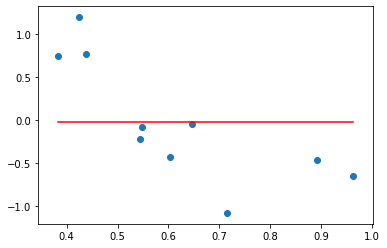

mean squared validation error L2:  69.31124523532998


Degree:  1
mean squared error L2:  0.8964764542464375
predicted values : [ 0.63731351  0.52195814  0.48199178  0.17420374  0.16292927  0.00816926
 -0.11555509 -0.31433469 -0.82088055 -1.02710271]
intercept:  1.7372496030522677 coeffecients:  [ 0.         -2.86858892]


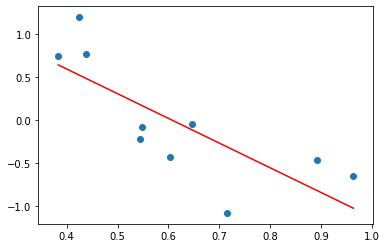

mean squared validation error L2:  49.8675475900173


Degree:  3
mean squared error L2:  0.39056728444269406
predicted values : [ 1.06214234  0.76904838  0.67106193 -0.00715433 -0.02903907 -0.30461889
 -0.4886241  -0.7074267  -0.74710114 -0.50959575]
intercept:  4.115082623393219 coeffecients:  [ 0.         -7.40984262 -4.18180073  7.15086888]


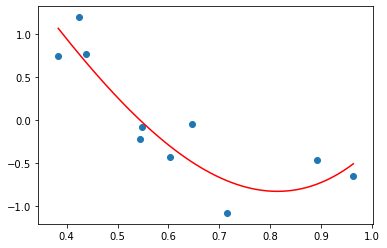

mean squared validation error L2:  105.74870038982426


Degree:  6
mean squared error L2:  0.08727894874122345
predicted values : [ 0.74964675  1.07174084  0.89876566 -0.22152828 -0.22284213 -0.15424871
 -0.24960223 -1.03558325 -0.47499877 -0.65265721]
intercept:  -1542.9274242935655 coeffecients:  [      0.           15572.49954461  -64031.10168436  137433.53103062
 -162505.7306149   100410.81667193  -25342.44598438]


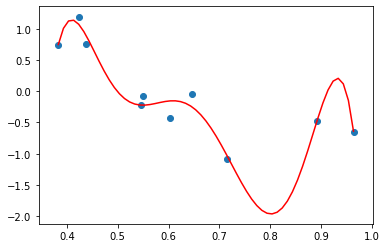

mean squared validation error L2:  4925492.796796041


Degree:  9
mean squared error L2:  1.639504621289347e-13
predicted values : [ 0.7406472   1.18864197  0.76269618 -0.21744845 -0.07998664 -0.43490545
 -0.04654611 -1.07875452 -0.47226743 -0.65338329]
intercept:  1302963.792350494 coeffecients:  [ 0.00000000e+00 -2.07859530e+07  1.45707725e+08 -5.88964673e+08
  1.51257676e+09 -2.55916779e+09  2.85217431e+09 -2.01884217e+09
  8.23441573e+08 -1.47444979e+08]


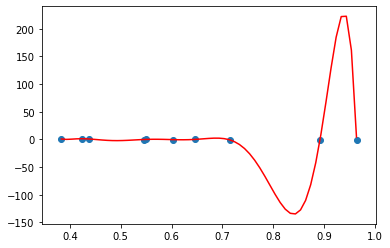

mean squared validation error L2:  2244085999046.1885



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import operator

m=[0,1,3,6,9]
for i in m:
    print()
    print("Degree: ",i )
    
    # model preperation
    x = randx.reshape(-1, 1)
    y = fun
    polynomial_features= PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    # error calculation on training set
    error=[]
    for j in range(10):
        error.append((y_poly_pred[j]-y[j])**2)
    l2=sum(error)/2
    print("mean squared error L2: ",l2)
    print("predicted values :", y_poly_pred)          
    print("intercept: ",model.intercept_, "coeffecients: ",model.coef_)
    
    # plotting of train set
    fig = plt.figure() 
    #plt = fig.add_subplot() 
    plt.scatter(x, y)
    
    # plotting of model
    x_full = np.arange(min(x),max(x),0.01)
    x_full_new = polynomial_features.fit_transform(x_full.reshape(-1,1))
    plt.plot(x_full,model.predict(x_full_new),color="red")
    plt.show()
    
    # error calculation on validation set
    valid_x=valid_randx.reshape(-1, 1)
    valid_x_poly = polynomial_features.fit_transform(valid_x)
    y_poly_pred = model.predict(valid_x_poly)
    for j in range(100):
        error.append((y_poly_pred[j]-valid_fun[j])**2)
    valid_l2=sum(error)/2
    print("mean squared validation error L2: ",valid_l2)
    print()
    

In [16]:
#We see a classic example of overfitting and underfitting in the above case. For the order 0, we see that the model struggles to fit the datapoints properly and has the most MSE error, whereas at the other end we see that the order 9 polynomial is overfitting the datapoints immensely, which leads to a very low training MSE.
#We see as the order of the matrix increases, the weight values increase sharply. This is the side effects of overfitting error in higher order polynomials.

In [17]:
valid_randx=np.random.uniform(size=100)
valid_randx.sort()
valid_noise=np.random.normal(loc=0.0, scale=0.75, size=100)


Degree:  0
mean squared error L2:  67.01459745899164
predicted values : [-0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0.02913073
 -0.02913073 -0.02913073 -0.02913073 -0.02913073 -0

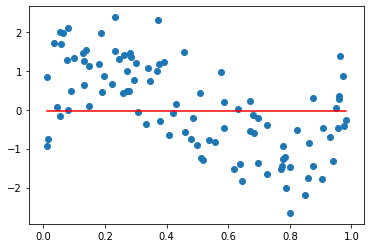


Degree:  1
mean squared error L2:  47.023261793018555
predicted values : [ 1.70446892  1.6992785   1.69011975  1.63580931  1.60927525  1.58398898
  1.57840344  1.57417584  1.55378824  1.51649319  1.50913344  1.50460305
  1.48021533  1.456574    1.36760161  1.3600795   1.35719704  1.344539
  1.31572008  1.31229437  1.21760196  1.200448    1.19265399  1.17198188
  1.09377626  1.07259288  1.07106532  1.03339194  0.99307291  0.98534038
  0.96178997  0.95463572  0.94094051  0.92908174  0.92395058  0.89669486
  0.8720871   0.85713755  0.78159311  0.76721058  0.74117938  0.67993189
  0.67342537  0.66493338  0.64739535  0.61082451  0.56904209  0.53089475
  0.50260193  0.42876983  0.41811211  0.36500184  0.34418366  0.31043824
  0.27422091  0.27048564  0.24892484  0.19917678  0.13838766  0.0805163
  0.0550799   0.0516678  -0.03518463 -0.07124636 -0.09713417 -0.11462605
 -0.18446558 -0.19057929 -0.2173854  -0.22280366 -0.25821384 -0.26214896
 -0.34418235 -0.34834151 -0.47322979 -0.483174   -0.4

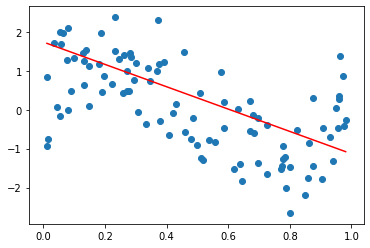


Degree:  3
mean squared error L2:  117.03518961597317
predicted values : [ 4.02987154  4.01628346  3.99224456  3.84813941  3.77682456  3.70834937
  3.69315909  3.68164671  3.62595008  3.52334068  3.50298782  3.49044312
  3.42270811  3.35673409  3.10610809  3.08477615  3.07659678  3.04064645
  2.95862233  2.94885743  2.6780629   2.62889323  2.60654817  2.54727673
  2.32322173  2.26265739  2.25829312  2.15081975  2.03621491  2.0142944
  1.94766518  1.92746634  1.88885876  1.85549334  1.84107602  1.76470389
  1.69607683  1.65454766  1.44680812  1.40769969  1.33731318  1.17388381
  1.15671446  1.13436433  1.08842002  0.9935813   0.88692032  0.79122317
  0.72134728  0.54373387  0.51869121  0.39627954  0.34941878  0.27486201
  0.1968437   0.1889184   0.1436247   0.04214262 -0.07586201 -0.18172022
 -0.22615557 -0.23201643 -0.37297664 -0.42668513 -0.46342516 -0.48737222
 -0.57572308 -0.58289122 -0.61321739 -0.61912685 -0.65589346 -0.65977869
 -0.73137464 -0.73451712 -0.80593064 -0.80965144 -0

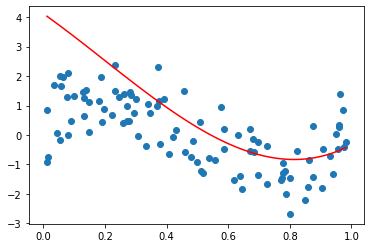


Degree:  6
mean squared error L2:  6423429.10272481
predicted values : [-1.37313261e+03 -1.34770183e+03 -1.30376333e+03 -1.06648812e+03
 -9.64064202e+02 -8.74028656e+02 -8.55091230e+02 -8.40980011e+02
 -7.75550146e+02 -6.66531607e+02 -6.46560550e+02 -6.34509411e+02
 -5.72710092e+02 -5.17528107e+02 -3.46769960e+02 -3.34724616e+02
 -3.30198587e+02 -3.10898466e+02 -2.70306189e+02 -2.65776936e+02
 -1.62496781e+02 -1.47797571e+02 -1.41474862e+02 -1.25728834e+02
 -7.80850251e+01 -6.79948357e+01 -6.73080702e+01 -5.19816344e+01
 -3.86726721e+01 -3.64455334e+01 -3.02458911e+01 -2.85271871e+01
 -2.54377129e+01 -2.29653547e+01 -2.19513096e+01 -1.70923194e+01
 -1.34031422e+01 -1.14520497e+01 -4.36052671e+00 -3.44399122e+00
 -2.06608909e+00  1.65087371e-02  1.60361281e-01  3.29576517e-01
  6.17864100e-01  9.94137301e-01  1.14181684e+00  1.09887340e+00
  9.96869588e-01  6.01827206e-01  5.40417134e-01  2.52706334e-01
  1.54408859e-01  1.83963777e-02 -9.25666507e-02 -1.01916008e-01
 -1.48408221e-01 -

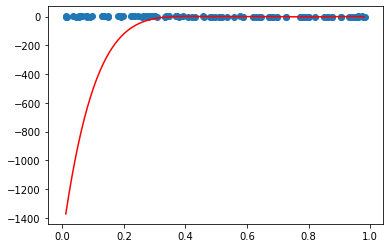


Degree:  9
mean squared error L2:  2846954165267.511
predicted values : [ 1.08360709e+06  1.05203261e+06  9.98284775e+05  7.26314384e+05
  6.18917376e+05  5.29799941e+05  5.11706619e+05  4.98374513e+05
  4.38261651e+05  3.44554084e+05  3.28296147e+05  3.18625821e+05
  2.70729905e+05  2.30436077e+05  1.21788324e+05  1.15113797e+05
  1.12641982e+05  1.02326530e+05  8.18560539e+04  7.96782061e+04
  3.63166617e+04  3.12111614e+04  2.91050538e+04  2.41036931e+04
  1.12643872e+04  9.03375676e+03  8.88874741e+03  5.89086036e+03
  3.68455200e+03  3.35455537e+03  2.49959340e+03  2.27981909e+03
  1.90448702e+03  1.62303211e+03  1.51261977e+03  1.02614709e+03
  7.06963219e+02  5.57143665e+02  1.39499664e+02  1.02345975e+02
  5.53151601e+01  8.16245485e+00  6.22512697e+00  4.22206583e+00
  1.57680874e+00  1.32314235e-02  6.55702405e-01  1.17127416e+00
  1.07819418e+00 -5.82889713e-01 -8.70643012e-01 -1.97714645e+00
 -2.18213958e+00 -2.20340148e+00 -1.85748684e+00 -1.80528354e+00
 -1.46401536e+00 

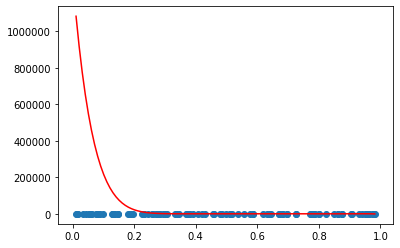

In [18]:
m=[0,1,3,6,9]
for i in m:
    print()
    print("Degree: ",i )
    
    # train model with train dataset
    x = randx.reshape(-1, 1)
    y = fun
    polynomial_features= PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    
    # calculating validation error of above trained model
    x = valid_randx.reshape(-1, 1)
    y = valid_fun
    polynomial_features= PolynomialFeatures(degree=i)
    x_poly_new = polynomial_features.fit_transform(x)
    y_poly_pred = model.predict(x_poly_new)
    error=[]
    for j in range(100):
        error.append((y_poly_pred[j]-y[j])**2)
    l2=sum(error)/2
    print("mean squared error L2: ",l2)
    print("predicted values :", y_poly_pred)          
    print("intercept: ",model.intercept_, "coeffecients: ",model.coef_)
    
    # plotting validation set
    fig = plt.figure() 
    #plt = fig.add_subplot() 
    plt.scatter(x, y)
    
    #plotting the model
    x_full = np.arange(min(x),max(x),0.01)
    x_full_new = polynomial_features.fit_transform(x_full.reshape(-1,1))
    plt.plot(x_full,model.predict(x_full_new),color="red")
    
    plt.show()

In [19]:
#We see that due to overfitting, the validation MSE becomes very high in higher order polynomials

### Regularization

We've seen the effects of increasing model complexity on the training error and the validation error above. We will now use L2 regularization to reduce overfitting.

- Fit a polynomial regression model of order $M=9$ to the same training dataset as before but now using the regularized error function given by $E^{'}(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2 + \frac{\lambda}{2}{\|\textbf{w}\|}^2$ where $\lambda$ is the regularization hyperparameter. Use the following values for $\lambda$: $\lambda={0.01, 0.1, 1}$.
- Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.
- Find the optimal value of the hyperparameter $\lambda$. 
- Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.


lambda:  0.01
mean squared error L2:  0.4576627516344921
predicted values : [ 0.87345855  0.68145933  0.61366267  0.08026929  0.0607248  -0.20290368
 -0.40221393 -0.68083276 -0.8510163  -0.48698411]


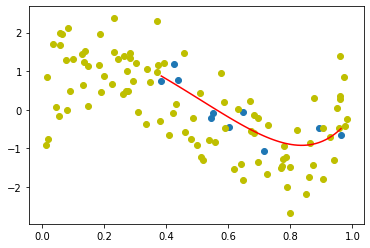

mean squared validation error L2:  51.059959354825686


lambda:  0.1
mean squared error L2:  0.7401928612183768
predicted values : [ 0.56732466  0.46561395  0.42871977  0.11761685  0.10540566 -0.06644819
 -0.20725853 -0.42944031 -0.7649263  -0.62996471]


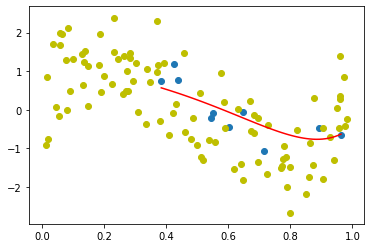

mean squared validation error L2:  39.14928977959314


lambda:  1
mean squared error L2:  1.4193577877328958
predicted values : [ 0.21382097  0.18655283  0.17636116  0.08286357  0.0788703   0.01931123
 -0.03531436 -0.13834877 -0.51287382 -0.72635188]


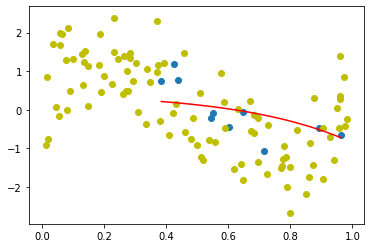

mean squared validation error L2:  53.74433781097361



In [20]:
import sklearn
from sklearn.kernel_ridge import KernelRidge
lamda=[0.01,0.1,1]
for i in lamda:
    print()
    print("lambda: ",i )
    
    #Ridge model on training set
    x = randx.reshape(-1, 1)
    y = fun
    polynomial_features= PolynomialFeatures(degree=9)
    x_poly = polynomial_features.fit_transform(x)
    model=sklearn.kernel_ridge.KernelRidge(alpha=i, degree=9)
    model.fit(x_poly, y)
    
    # error on training set
    y_poly_pred = model.predict(x_poly)
    error=[]
    for j in range(10):
        error.append((y_poly_pred[j]-y[j])**2)
    l2=sum(error)/2
    print("mean squared error L2: ",l2)
    print("predicted values :", y_poly_pred)          
    #print("intercept: ",model.intercept_, "coeffecients: ",model.coef_)
    
    # plotting training data
    fig = plt.figure() 
    #plt = fig.add_subplot() 
    plt.scatter(x, y)
    
    # plotting model
    x_full = np.arange(min(x),max(x),0.01)
    x_full_new = polynomial_features.fit_transform(x_full.reshape(-1,1))
    plt.plot(x_full,model.predict(x_full_new),color="red")
    
    #plotting validation set
    plt.scatter(valid_randx, valid_fun,color="y")
    plt.show()
    
    # calculating validation set error
    valid_x=valid_randx.reshape(-1, 1)
    valid_x_poly = polynomial_features.fit_transform(valid_x)
    y_poly_pred = model.predict(valid_x_poly)
    for j in range(100):
        error.append((y_poly_pred[j]-valid_fun[j])**2)
    valid_l2=sum(error)/2
    print("mean squared validation error L2: ",valid_l2)
    print()
    
    

In [21]:
#We see that regularization has helped reduce the effect of overfitting in the higher order polynomials, and also has helped reduce the weight values, which in turn help to fit the datapoints better, thus in turn decreasing the validation error.


lambda:  0.01
mean squared error L2:  28.847638646961677
predicted values : [ 0.8125544   0.81710447  0.82500124  0.86834444  0.88733584  0.90408826
  0.90761083  0.91023409  0.92236443  0.94231391  0.94590685  0.94806198
  0.9589212   0.96824915  0.99268849  0.99397701  0.99443848  0.99625295
  0.99909324  0.99931136  0.99524512  0.99241709  0.99091964  0.98630444
  0.96038168  0.95105615  0.95034574  0.93121259  0.90730873  0.90232057
  0.88633026  0.88123509  0.87117349  0.86213478  0.85813014  0.83591252
  0.81449196  0.80085137  0.72475386  0.70892673  0.6792088   0.60393052
  0.59549939  0.58437202  0.56095207  0.51024092  0.44927984  0.39090589
  0.34600015  0.22272708  0.20424543  0.10976732  0.07171617  0.00892377
 -0.05986747 -0.06703795 -0.10868237 -0.2062441  -0.32758439 -0.44430336
 -0.49569058 -0.50257907 -0.67653118 -0.74729137 -0.79724326 -0.83050819
 -0.95833878 -0.96907758 -1.01514525 -1.02424303 -1.08174123 -1.08790733
 -1.20443538 -1.20965943 -1.32718015 -1.3327411

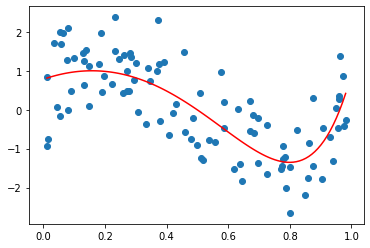


lambda:  0.1
mean squared error L2:  29.72941078215954
predicted values : [ 1.03006025  1.03005956  1.03000526  1.02826926  1.02652294  1.02429677
  1.02373012  1.02328306  1.02090591  1.01559592  1.01439904  1.0136376
  1.00921285  1.0043929   0.98143069  0.97913098  0.97823462  0.97419869
  0.96439897  0.96317709  0.92448508  0.91643716  0.91267282  0.90235986
  0.85893853  0.84595165  0.8449946   0.82050809  0.79239682  0.78677743
  0.76920568  0.76373059  0.75307051  0.74364877  0.73951689  0.71700701
  0.69586558  0.68263965  0.61133349  0.59690375  0.57008618  0.50340722
  0.49602728  0.48630952  0.46593238  0.42210829  0.36983858  0.32007941
  0.28193046  0.17748464  0.16183581  0.08177671  0.04947754 -0.00392932
 -0.0626306  -0.06876274 -0.10443213 -0.18840809 -0.2937967  -0.39634253
 -0.44190376 -0.44803198 -0.60458127 -0.66937004 -0.71555058 -0.74652553
 -0.8674396  -0.87775108 -0.92229973 -0.93116168 -0.9877217  -0.99384897
 -1.11262313 -1.11811805 -1.25075709 -1.25808292 -

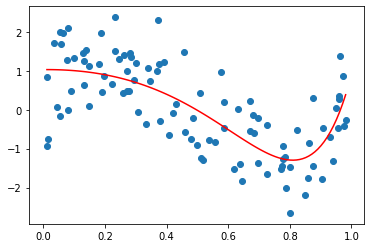


lambda:  1
mean squared error L2:  32.47977695857494
predicted values : [ 1.07616308  1.07378969  1.06957592  1.04390111  1.03092099  1.0182785
  1.01544953  1.01329952  1.00282382  0.98319465  0.97924887  0.97680804
  0.96351099  0.95036412  0.89855532  0.89400206  0.89224996  0.8845077
  0.86658584  0.86442798  0.80241108  0.79067621  0.78529257  0.77085533
  0.71411941  0.69816301  0.69700251  0.66795823  0.63596135  0.62971566
  0.6104749   0.60456431  0.59316415  0.58320138  0.57886423  0.5555579
  0.53412555  0.52092302  0.45208091  0.43856918  0.41378238  0.35377262
  0.34725809  0.33871534  0.32092826  0.28321451  0.2391013   0.19788266
  0.1667396   0.08324155  0.07093077  0.00866153 -0.01614892 -0.05681777
 -0.1010483  -0.10564224 -0.13227011 -0.19436728 -0.27125418 -0.34511176
 -0.37766345 -0.3820305  -0.49278469 -0.53823189 -0.57051445 -0.59212274
 -0.67621685 -0.68337559 -0.71429481 -0.72044504 -0.75971414 -0.7639715
 -0.84685198 -0.85071413 -0.94638357 -0.95199785 -0.957

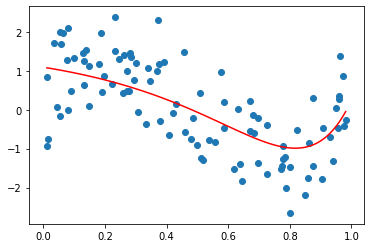

In [22]:
# extra
import sklearn
from sklearn.kernel_ridge import KernelRidge
lamda=[0.01,0.1,1]
for i in lamda:
    print()
    print("lambda: ",i )
    
    # Ridge model on validation set
    x = valid_randx.reshape(-1, 1)
    y = valid_fun
    polynomial_features= PolynomialFeatures(degree=9)
    x_poly = polynomial_features.fit_transform(x)
    model=sklearn.kernel_ridge.KernelRidge(alpha=i, degree=9)
    model.fit(x_poly, y)
    
    # error on validation set
    y_poly_pred = model.predict(x_poly)
    error=[]
    for j in range(100):
        error.append((y_poly_pred[j]-y[j])**2)
    l2=sum(error)/2
    print("mean squared error L2: ",l2)
    print("predicted values :", y_poly_pred)          
    
    
    # plotting validation set
    fig = plt.figure() 
    #plt = fig.add_subplot() 
    plt.scatter(x, y)
    
    # plotting model
    x_full = np.arange(min(x),max(x),0.01)
    x_full_new = polynomial_features.fit_transform(x_full.reshape(-1,1))
    plt.plot(x_full,model.predict(x_full_new),color="red")
    
    
    plt.show()
    

### Bias-variance trade-off:

In class you have seen that the expected prediction error for any model can be decomposed as the sum of $bias^2, variance$ and $irreducible\,noise$. We will now observe the bias-variance trade-off for a polynomial regression model of order $M=9$ with varying regularization hyperparameter.
- Generate $50$ datasets, each containing $10$ points, independently, from the curve $f(x)=sin(2\pi x)$. Add gaussian noise $N(0,0.5)$ to each data point.
- Fit a polynomial regression model of order $M=9$ to each training dataset by minimizing the regularized error function $E^{'}(\textbf{w})$ with $\lambda=1$.
- Plot the following:
  - function obtained by training the model on each of the 50 datasets in the same figure.
  - The corresponding average of the 50 fits and the sinusoidal function from which the datasets were generated in the same figure.
- Repeat this exercise for two more $\lambda$ values: $\lambda$ = 0.1, 10.
- Based on the plots obtained, explain the trend in the bias and variance values with increasing model complexity.
- Bonus (optional and will not be graded) : 
  - Plot the $bias^2$, $variance$  and $bias^2 + variance$ against $\lambda$.
  - Also plot the average test error on a test data size of 1000 points (generated in a similiar way as the 50 training datasets, but independently) against $\lambda$ on the same figure.
  - For your reference: 
$$
Bias^2= (E_{D}[\hat f(x)] - f(x))^2
\\
Variance = E_{D}[(\hat f(x) - E_{D}[\hat f(x)])^2]
$$
Here $\hat f$ is the trained model and $D$ is the set of all datasets. Use the $50$ training datasets to compute the empirical estimations.

In [23]:
x_avg=np.arange(0,1,0.01)

In [24]:
len(x_avg)

100

lambda:  1


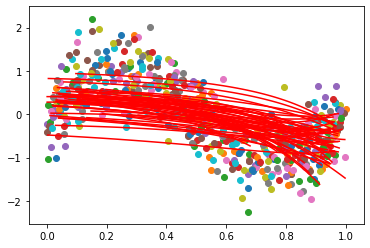

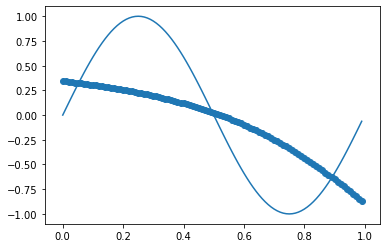

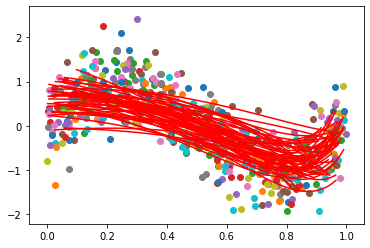

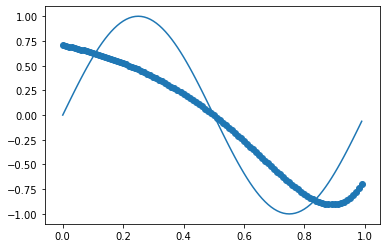


lambda:  10


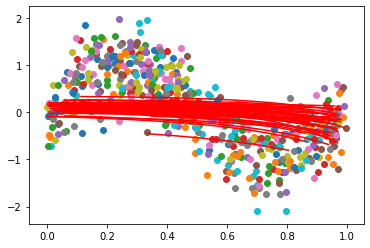

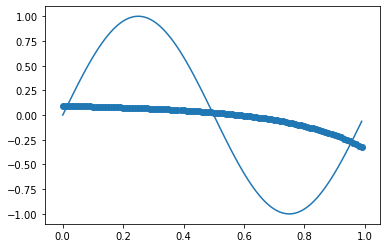

In [25]:

def var_lambda(lamda):
    for i in lamda:
        #print()
        #print("lambda: ",i )
        
        # model on train set
        x = randx.reshape(-1, 1)
        y = fun
        polynomial_features= PolynomialFeatures(degree=9)
        x_poly = polynomial_features.fit_transform(x)
        model=sklearn.kernel_ridge.KernelRidge(alpha=i, degree=9)
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        error=[]
        
        # plot train set
        plt.scatter(x, y)
        
        # plot model
        x_full = np.arange(min(x),max(x),0.01)
        x_full_new = polynomial_features.fit_transform(x_full.reshape(-1,1))
        plt.plot(x_full,model.predict(x_full_new),color="red")
        
        # error on training set
        for j in range(10):
            error.append((y_poly_pred[j]-y[j])**2)
        l2=sum(error)/2
            
        #predicting y for x_avg
        global y_model_values
        polynomial_features= PolynomialFeatures(degree=9)
        x_poly = polynomial_features.fit_transform(x_avg.reshape(-1,1))
        y_poly_pred = model.predict(x_poly)
        #print((y_poly_pred))
        y_model_values.append(y_poly_pred)

        
error=[]

#actual y for x_avg
actual_fun=[]
for i in range(100):
    actual_fun.append(math.sin(2*math.pi*x_avg[i]))


y_model_values=[]
for k in range(50):
    
    # generating 10 data points
    randx=np.random.uniform(size=10)
    randx.sort()
    noise=np.random.normal(loc=0.0, scale=0.5, size=10)
    fun=[]
    for i in range(10):
        fun.append(math.sin(2*math.pi*randx[i])+noise[i])
    
    # model creation
    var_lambda([1,])
print("lambda: ",'1' )

#Plotting 50 models on the same plot with 50 training datasets
plt.show()

# plotting average fit
avg=[]
y_model_values=np.array(y_model_values).transpose()
for i in y_model_values:
    avg.append(np.sum(i)/50)
#print(x_avg, avg)
plt.scatter(x_avg.tolist(), avg)
plt.plot(x_avg.tolist(),actual_fun)# plotting actual curve
plt.show()


y_model_values=[]
for k in range(50):
    randx=np.random.uniform(size=10)
    randx.sort()
    noise=np.random.normal(loc=0.0, scale=0.5, size=10)
    fun=[]
    for i in range(10):
        fun.append(math.sin(2*math.pi*randx[i])+noise[i])
    var_lambda([0.1,])
#print("lambda: ",'0.1' )
plt.show()

avg=[]
y_model_values=np.array(y_model_values).transpose()
for i in y_model_values:
    avg.append(np.sum(i)/50)
#print(x_avg, avg)
plt.scatter(x_avg.tolist(), avg)
plt.plot(x_avg.tolist(),actual_fun)
plt.show()


print()
y_model_values=[]
for k in range(50):
    randx=np.random.uniform(size=10)
    randx.sort()
    noise=np.random.normal(loc=0.0, scale=0.5, size=10)
    fun=[]
    for i in range(10):
        fun.append(math.sin(2*math.pi*randx[i])+noise[i])
    var_lambda([10,])
print("lambda: ",'10')
plt.show()

avg=[]
y_model_values=np.array(y_model_values).transpose()
for i in y_model_values:
    avg.append(np.sum(i)/50)
#print(x_avg, avg)
plt.scatter(x_avg.tolist(), avg)
plt.plot(x_avg.tolist(),actual_fun)
plt.show()

In [26]:
#We see that as regularization increases, the model complexity decreases. This decrease in model complexity helps reduce the variance in the model, but along with that it also increases the bias in the model. Thus a model with a decent level of bias and variance error is important for a good prediction model

#Problem 3: Logistic Regression

## Binary Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic **sigmoid function** $h_ \theta (\cdot)$ to return a probability value which can then be mapped to two or more discrete classes. $$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^Tx} }  $$ 

<br>here, the vector $\theta$ represents the weights and the vector $x$ represents the given inputs.


## Problem 3, Part A: Dataset A



Use Dataset A (``data_prob3_parta.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [27]:
import pandas as pd
data=pd.read_csv("data_prob3_parta.csv")
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data, 0.25)
print(len(train_set), "train +", len(test_set), "test")

1125 train + 375 test


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

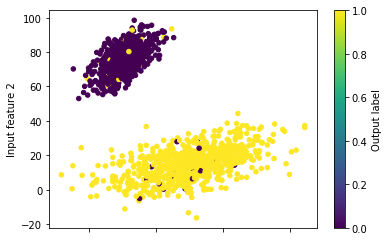

In [28]:
ax2 = data.plot.scatter(x='Input feature 1',
                      y='Input feature 2',
                      c='Output label',
                      colormap='viridis')

Build the logistic regression model using the training data. 

The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_set.drop(['Output label'],axis=1), train_set['Output label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Print the final weights.

In [30]:
print(log_reg.intercept_[0],log_reg.coef_[0][0],log_reg.coef_[0][1])

0.8629159776652173 0.15885395749419948 -0.08764360652922332


Print the final accuracy on test data.

In [31]:
from sklearn import metrics
pred_y=log_reg.predict(test_set.drop(['Output label'],axis=1))
print("Accuracy:",metrics.accuracy_score(test_set['Output label'], pred_y))

Accuracy: 0.9706666666666667


In [32]:
test_set

,Input feature 1,Input feature 2,Output label
959,19.4,86.6,0.0
595,10.5,68.3,0.0
166,14.1,70.0,0.0
796,17.6,71.7,1.0
541,13.9,62.0,0.0
...,...,...,...
1361,21.9,14.2,1.0
499,19.3,86.9,0.0
1337,38.9,35.0,1.0
246,23.3,12.5,1.0


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

In [33]:
# Creating mesh for plotting decision boundary
h = .2
x_min, x_max = (test_set.drop(['Output label'],axis=1).values)[:, 0].min() - 1, (test_set.drop(['Output label'],axis=1).values)[:, 0].max() + 1
y_min, y_max = (test_set.drop(['Output label'],axis=1).values)[:, 1].min() - 1, (test_set.drop(['Output label'],axis=1).values)[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = log_reg.predict((np.c_[xx.ravel(), yy.ravel()]))

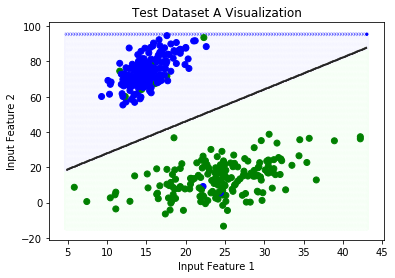

In [34]:
from matplotlib.pyplot import contourf
plt.title("Test Dataset A Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.binary)# model boundary
plt.scatter(xx,yy,c=Z,cmap="brg",s=20, edgecolor='w')# model boundary area
plt.scatter(test_set.values.T[0],test_set.values.T[1],color=['blue' if l==0 else 'green' for l in test_set.values.T[2]])# plotting test set

plt.show()

## Problem 3, Part B: Dataset B



Use Dataset B (``data_prob3_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [35]:
import pandas as pd
data=pd.read_csv("data_prob3_partb.csv")
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data, 0.25)
print(len(train_set), "train +", len(test_set), "test")

1125 train + 375 test


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

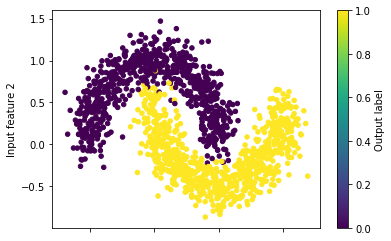

In [36]:
ax2 = data.plot.scatter(x='Input feature 1',
                      y='Input feature 2',
                      c='Output label',
                      colormap='viridis')

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [37]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_set.drop(['Output label'],axis=1), train_set['Output label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Print the final weights.

In [38]:
print(log_reg.intercept_[0],log_reg.coef_[0][0],log_reg.coef_[0][1])

0.4964769355583008 1.171705869403204 -4.563527241147305


Print the final accuracy on test data.

In [39]:
from sklearn import metrics
pred_y=log_reg.predict(test_set.drop(['Output label'],axis=1))
print("Accuracy:",metrics.accuracy_score(test_set['Output label'], pred_y))

Accuracy: 0.8773333333333333


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

In [40]:
# Creating mesh for plotting decision boundary
h = .03
x_min, x_max = (test_set.drop(['Output label'],axis=1).values)[:, 0].min() - 1, (test_set.drop(['Output label'],axis=1).values)[:, 0].max() + 1
y_min, y_max = (test_set.drop(['Output label'],axis=1).values)[:, 1].min() - 1, (test_set.drop(['Output label'],axis=1).values)[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = log_reg.predict((np.c_[xx.ravel(), yy.ravel()]))

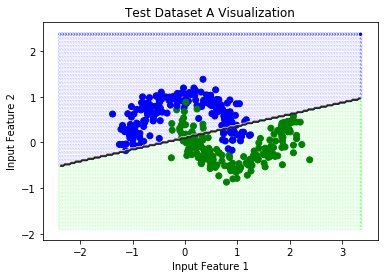

In [41]:
from matplotlib.pyplot import contourf
plt.title("Test Dataset A Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.binary)
plt.scatter(xx,yy,c=Z,cmap="brg",s=20, edgecolor='w')
plt.scatter(test_set.values.T[0],test_set.values.T[1],color=['blue' if l==0 else 'green' for l in test_set.values.T[2]])

plt.show()

As you can see, a straight line is not the best decision boundary for this type of data. In the next part, we will try polynomial feature mapping to generate more features and build the classifier on top of it.

## Problem 3, Part C: Polynomial Feature Mapping



Use Dataset B (``data_prob3_partb.csv``) for this part of the question.


Generate more features for each datapoint using the following transformation.

For a datapoint $(x_1, x_2)$,
$$ (x_1, x_2) \rightarrow (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, ..., x_1^T, x_2^T) $$
Now, instead of giving $(x_1, x_2)$ as the input to the classifier, use the transformed data as the input to the classifier.

Generate the transformed training and testing dataset using Dataset B (``data_prob3_partb.csv``).

In [42]:
columns = list(data)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import operator
def fitpoly(degree):
    
    #polynomial_features= PolynomialFeatures(degree=i)
    #x_poly = polynomial_features.fit_transform(x)
    data["x12"]=data['Input feature 1']**2
    data["x22"]=data['Input feature 2']**2
    data["x13"]=data['Input feature 1']**3
    data["x23"]=data['Input feature 2']**3
    data["x24"]=data['Input feature 2']**4
    data["x14"]=data['Input feature 1']**4
    data["x15"]=data['Input feature 1']**5
    data["x25"]=data['Input feature 2']**5
    data["x16"]=data['Input feature 1']**6
    data["x26"]=data['Input feature 2']**6
    data["x17"]=data['Input feature 1']**7
    data["x27"]=data['Input feature 2']**7
    data["x18"]=data['Input feature 1']**8
    data["x28"]=data['Input feature 2']**8
    data["x19"]=data['Input feature 1']**9
    data["x29"]=data['Input feature 1']**9
    data["x110"]=data['Input feature 1']**10
    data["x210"]=data['Input feature 1']**10
    def split_train_test(data, test_ratio):
        shuffled_indices = np.random.permutation(len(data))
        test_set_size = int(len(data) * test_ratio)
        test_indices = shuffled_indices[:test_set_size]
        train_indices = shuffled_indices[test_set_size:]
        return data.iloc[train_indices], data.iloc[test_indices]
    
    train_set, test_set = split_train_test(data, 0.25)
    print(len(train_set), "train +", len(test_set), "test")
    x = train_set.drop(['Output label'],axis=1)
    columns = list(x)
    #print(x)
    y = train_set['Output label']
    x_test = test_set.drop(['Output label'],axis=1)
    y_test = test_set['Output label']
    return (x[columns[0:degree*2]],y,x_test[columns[0:degree*2]],y_test)

In [44]:
def transform(data):
    data["x12"]=data['Input feature 1']**2
    data["x22"]=data['Input feature 2']**2
    data["x13"]=data['Input feature 1']**3
    data["x23"]=data['Input feature 2']**3
    data["x24"]=data['Input feature 2']**4
    data["x14"]=data['Input feature 1']**4
    data["x15"]=data['Input feature 1']**5
    data["x25"]=data['Input feature 2']**5
    data["x16"]=data['Input feature 1']**6
    data["x26"]=data['Input feature 2']**6
    data["x17"]=data['Input feature 1']**7
    data["x27"]=data['Input feature 2']**7
    data["x18"]=data['Input feature 1']**8
    data["x28"]=data['Input feature 2']**8
    data["x19"]=data['Input feature 1']**9
    data["x29"]=data['Input feature 1']**9
    data["x110"]=data['Input feature 1']**10
    data["x210"]=data['Input feature 1']**10
    return data

Build the logistic regression model using the transformed training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
def modelfit(degree):
    log_reg = LogisticRegression()
    x,y,x_test,y_test=fitpoly(degree)
    #print(x_test)
    log_reg.fit(x, y)
    pred_y=log_reg.predict(x_test)
    
    # Creating mesh for plotting decision boundary
    h = .03
    x_min, x_max = (test_set.drop(['Output label'],axis=1).values)[:, 0].min() - 1, (test_set.drop(['Output label'],axis=1).values)[:, 0].max() + 1
    y_min, y_max = (test_set.drop(['Output label'],axis=1).values)[:, 1].min() - 1, (test_set.drop(['Output label'],axis=1).values)[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    df=pd.DataFrame({'Input feature 1': xx.ravel(),'Input feature 2': yy.ravel()})
    
    z = log_reg.predict(transform(df).iloc[:,0:2*degree])
    
    Z = z
    Z = Z.reshape(xx.shape)
    #print(z)
    plt.contour(xx, yy, Z, cmap=plt.cm.binary)
    plt.scatter(xx,yy,c=Z,cmap="brg",s=20, edgecolor='w')
    plt.scatter(test_set.values.T[0],test_set.values.T[1],color=['blue' if l==0 else 'green' for l in test_set.values.T[2]])

    plt.show()
    
    return metrics.accuracy_score(y_test, pred_y), log_reg.intercept_[0]+log_reg.coef_[0],Z
    #return log_reg,x_test,y_test

Try different values of $T$ (highest number of degree) between 3 to 10. Find out which value of $T$ gives the best test accuracy. Please print that values of $T$ in the below cell.

1125 train + 375 test


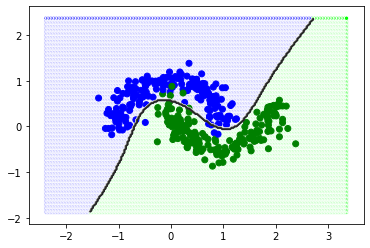

T:  3
Accuracy: 0.9786666666666667
weights:  [ 1.50520081 -1.91130255 -2.94605481  3.57992551  8.01222958  0.95983656]
1125 train + 375 test


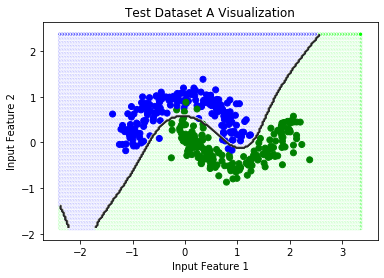

T:  4
Accuracy: 0.9813333333333333
weights:  [ 2.76302641 -1.87197975 -4.04756104  4.02897085  5.72049005  1.2347456
  2.35455536  5.22225037]
1125 train + 375 test


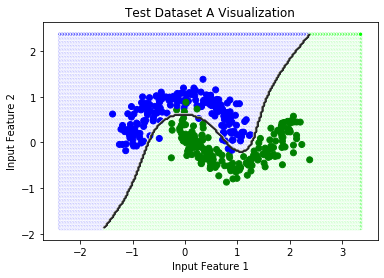

T:  5
Accuracy: 0.984
weights:  [ 3.35677614 -1.65198917 -2.45701536  4.37919054  3.90444062  1.77712678
  2.99042179  2.31836764  6.70185453  2.39623672]
1125 train + 375 test


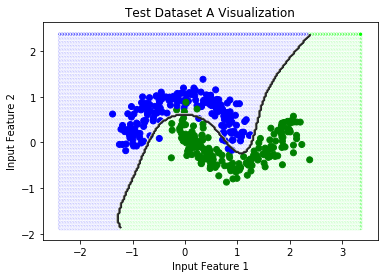

T:  6
Accuracy: 0.9946666666666667
weights:  [ 3.63184587 -1.71120205 -2.31914947  4.42311823  4.13772061  1.91156765
  3.18443097  1.59133333  5.65333712  2.614693    4.89433891  3.02147157]
1125 train + 375 test


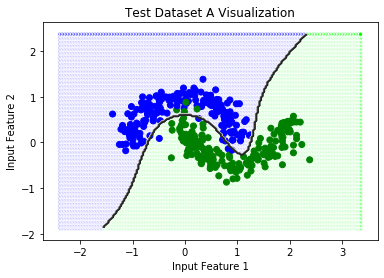

T:  7
Accuracy: 0.9813333333333333
weights:  [ 3.7612645  -2.06644313 -1.79394364  4.60969018  4.04128268  2.05378832
  3.38728488  1.63864752  4.76639026  2.82969086  3.5968553   3.22895524
  5.36133189  3.11152259]
1125 train + 375 test


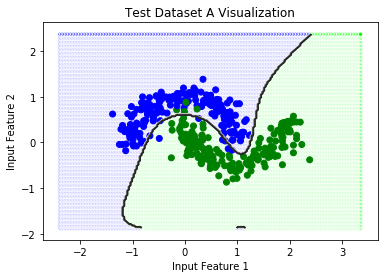

T:  8
Accuracy: 0.984
weights:  [ 3.69504134 -1.99055745 -1.3457797   4.58733699  4.06190272  2.13545081
  3.43684183  1.69695719  4.70452286  2.90891045  3.38384022  3.31651544
  5.1693664   3.21103602  4.23514325  3.39042698]
1125 train + 375 test


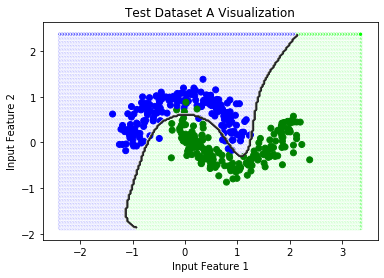

T:  9
Accuracy: 0.9733333333333334
weights:  [ 4.09657699 -1.9666986  -1.41535237  4.55038664  4.21367704  2.16197995
  3.49693433  1.6887216   4.59974531  2.98357591  3.21677161  3.40234876
  4.72272531  3.29175558  3.73291002  3.4688099   4.35315473  4.35315473]
1125 train + 375 test


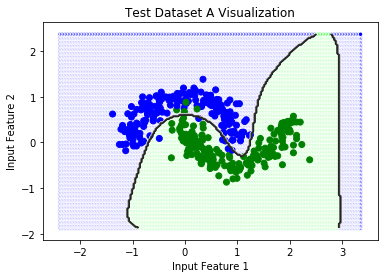

T:  10
Accuracy: 0.976
weights:  [ 3.96778989 -1.91826755 -1.6221478   4.48595057  4.1045387   2.00618981
  3.37277366  1.5592562   4.54190537  2.83214246  3.1536938   3.2684691
  4.71703831  3.15832367  3.75987918  3.34558583  4.45421225  4.45421225
  3.5530716   3.5530716 ]


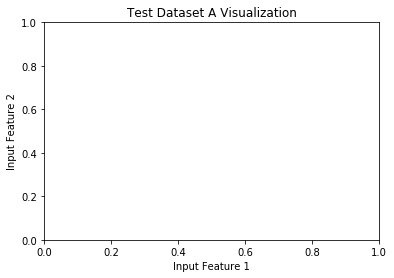

In [49]:
from sklearn import metrics
for i in [3,4,5,6,7,8,9,10]:
    accuracy,weights,z=modelfit(i)
    print("T: ", i)
    print("Accuracy:",accuracy)
    print("weights: ", weights)
    
    
    plt.title("Test Dataset A Visualization")
    plt.xlabel("Input Feature 1")
    plt.ylabel("Input Feature 2")
    

In [ ]:
# Best results = 4

Print the final weights.

Print the final accuracy on transformed test data.

Plot the scatter plot on test data (note that this is  the original data , not the transformed one). On top of this scatter plot, plot the new decision boundaries.

## Problem 3, Part D: Multi-class Logistic Regression

## Multi-class Logistic Regression

In case of a multi-class classification problem (when the number of classes is greater than two), a **softmax function** is used instead. 
$$\text{Softmax}(\theta_{i}) = \frac{\exp(\theta_i)}{\sum_{j=1}^{N} \exp(\theta_j)}$$ where $j$ varies from $1$ to $N$ which is the number of classes and  $\theta_{i}$ is $$\theta_{i}=W_{i}*x^{(i)}+b$$ Where $x^{(i)}$ is a feature  vector of dimensions $D \times 1$ and $W_{i}$ is the $i$-th row of the weight matrix $ W$ of  dimensions $N \times D$  and $b$ is the bias having dimensions $D \times 1$.


Use Dataset D (``data_prob3_partd.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [50]:
import pandas as pd
data=pd.read_csv("data_prob3_partd.csv")
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data, 0.25)
print(len(train_set), "train +", len(test_set), "test")

1125 train + 375 test


Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

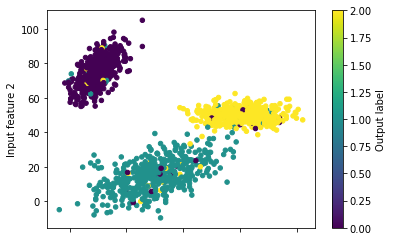

In [51]:
ax2 = data.plot.scatter(x='Input feature 1',
                      y='Input feature 2',
                      c='Output label',
                      colormap='viridis')

Build the logistic regression model using the training data. The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries.

In [52]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs")
softmax_reg.fit(train_set.drop(['Output label'],axis=1), train_set['Output label'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Print the final weights.

In [53]:
print(softmax_reg.intercept_[0],softmax_reg.coef_)

1.103869299760236 [[-0.12196475  0.04448721]
 [-0.05336514 -0.08041571]
 [ 0.17532988  0.03592851]]


Print the final accuracy on test data.

In [54]:
from sklearn import metrics
pred_y=softmax_reg.predict(test_set.drop(['Output label'],axis=1))
print("Accuracy:",metrics.accuracy_score(test_set['Output label'], pred_y))

Accuracy: 0.944


Plot the scatter plot on test data. On top of this scatter plot, plot the decision boundaries.

In [55]:
# Creating mesh for plotting decision boundary
h = .03
x_min, x_max = (test_set.drop(['Output label'],axis=1).values)[:, 0].min() - 1, (test_set.drop(['Output label'],axis=1).values)[:, 0].max() + 1
y_min, y_max = (test_set.drop(['Output label'],axis=1).values)[:, 1].min() - 1, (test_set.drop(['Output label'],axis=1).values)[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = softmax_reg.predict((np.c_[xx.ravel(), yy.ravel()]))

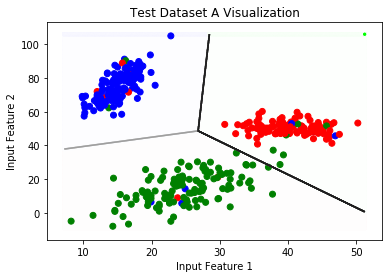

In [56]:
plt.title("Test Dataset A Visualization")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.binary)
plt.scatter(xx,yy,c=Z,cmap="brg",s=20, edgecolor='w')
plt.scatter(test_set.values.T[0],test_set.values.T[1],color=['blue' if l==0 else 'green' if l==1 else 'red' for l in test_set.values.T[2]])

plt.show()

# Problem 4: Learning on real world datasets

*Cric_data.csv* contains the batting averages and bowling averages of various cricket players along with their role in the team (Bowler/Batsman/Allrounder). The task is to predict the player role based on their batting and bowling averages.

In the next CodeWrite cell, extract the required columns from the csv file, partition the data into training (75%) and testing (25%) data randomly.  

In [57]:
# Extract data and partition

import pandas as pd
data = pd.read_csv('Cric_data.csv')

# X_train = 
# X_test = 
# Y_train = 
# Y_test = 
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# 3 class split
train, test = split_train_test(data, 0.25)
print(len(train), "train +", len(test), "test")
Y_train = train['Player Class']
X_train = train[['Batting Average', 'Bowling Average']]
Y_test = test['Player Class']
X_test = test[['Batting Average', 'Bowling Average']]

#2 class split
data=data[data["Player Class"]!=0]
train_b, test_b = split_train_test(data, 0.25)
print(len(train_b), "train +", len(test_b), "test")
Y_train_b = train_b['Player Class']
X_train_b = train_b[['Batting Average', 'Bowling Average']]
Y_test_b = test_b['Player Class']
X_test_b = test_b[['Batting Average', 'Bowling Average']]

954 train + 318 test
626 train + 208 test


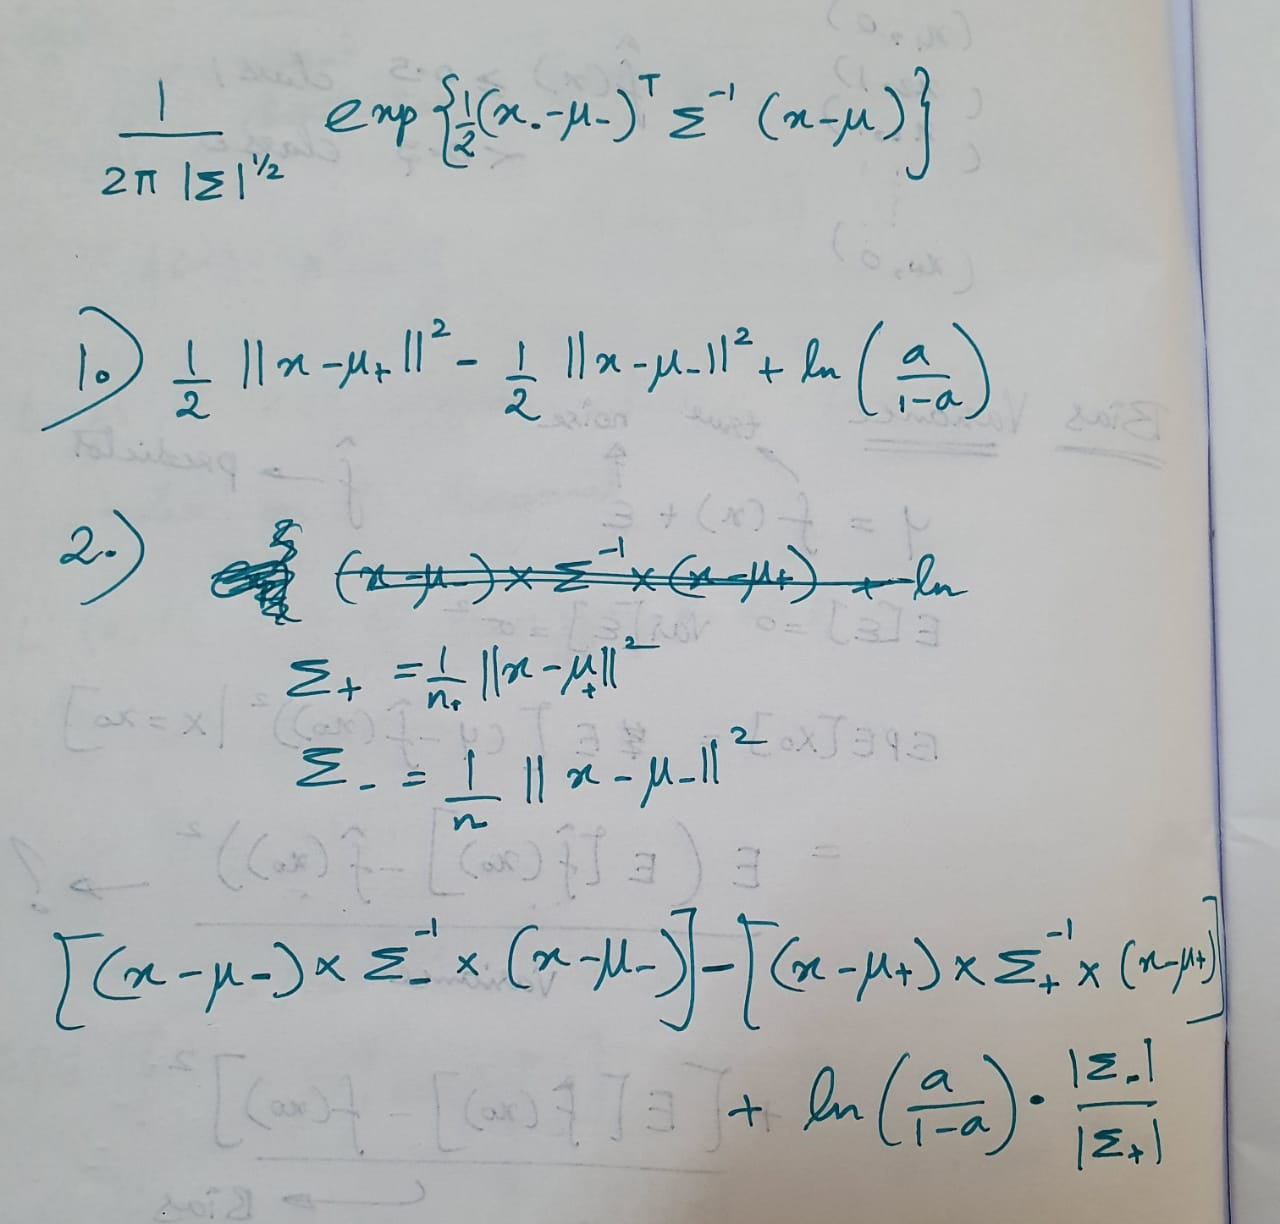

In [58]:
from IPython.display import Image
Image("WhatsApp Image 2020-03-18 at 1.38.04 PM.jpeg")



**Binary Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider only batsmen and bowlers in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

1a) Linear Predictor: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, I)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, I)$. 

1b) Bayes Classifier: Assume $\underline X|Y=Batsman \sim \mathcal{N}(\underline {\mu_-}, \Sigma_-)$ and  $X|Y=Bowler \sim \mathcal{N}(\underline {\mu_+}, \Sigma_+)$. 

In [59]:
def Lin_clsf_1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n=X_train.shape[0]
    d=X_train.shape[1]
    x1=X_train[(Y_train==1)]
    x2=X_train[(Y_train==-1)]
    y=(Y_train+1)/2
    
    upos=np.sum(x1,axis=0)/np.sum(y) # mu of positive class
    uneg=np.sum(x2,axis=0)/(n-np.sum(y)) # mu of negative class
    n1=X_test.shape[0]
    d1=X_test.shape[1]
    
    Y_test_pred=np.zeros(n1)-1 # assign every prediction as -1
    a=np.sum(y)/n      # probab of positive class
    ln=np.log(a/(1-a))  
    
    for i in range(n1):
        dis1=np.linalg.norm(upos-X_test[i])
        dis2=np.linalg.norm(uneg-X_test[i])
        if ((dis2**2)-(dis1**2))/2+ln>=0:
            Y_test_pred[i]=1          
            
    return Y_test_pred

def Bayes_clsf_1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n=X_train.shape[0]
    d=X_train.shape[1]
    x1=X_train[(Y_train==1)]
    x2=X_train[(Y_train==-1)]
    y=(Y_train+1)/2

    upos=np.sum(x1,axis=0)/np.sum(y)
    uneg=np.sum(x2,axis=0)/(n-np.sum(y))
    cov1=np.zeros((d,d))
    cov2=np.zeros((d,d))
    
    for i in range(len(x1)):
        cov1=cov1+(x1[i]-upos).reshape(d,1) @ (x1[i]-upos).reshape(1,d)
    for i in range(len(x2)):   
        cov2=cov2+(x2[i]-uneg).reshape(d,1) @ (x2[i]-uneg).reshape(1,d)
    cov1=cov1/np.sum(y)
    cov2=cov2/(n-np.sum(y))
    
    n1=X_test.shape[0]
    d1=X_test.shape[1]
    Y_test_pred=np.zeros(n1)-1
    a=np.sum(y)/n
    det1=np.linalg.det(cov1)**(0.5) 
    det2=np.linalg.det(cov2)**(0.5)
    ln=np.log((a/(1-a))*(det2/det1))
    for i in range(n1):
        e1=(X_test[i]-upos).reshape(1,d)@np.linalg.inv(cov1)
        e1=e1@(X_test[i]-upos).reshape(d,1)
        e2=(X_test[i]-uneg).reshape(1,d)@np.linalg.inv(cov2)
        e2=e2@(X_test[i]-uneg).reshape(d,1)
        if (e2-e1)/2 +ln>=0:
            Y_test_pred[i]=1
        
    return Y_test_pred

In [60]:
def BinaryLoss(y,pred):
    return abs((sum(list(np.array(y)-np.array(pred)))))
    

In [61]:
pred_lin_b = Lin_clsf_1a(X_train_b.values,Y_train_b.values,X_test_b.values)
pred_bay_b = Bayes_clsf_1b(X_train_b.values,Y_train_b.values,X_test_b.values)

lin_loss_b = BinaryLoss(Y_test_b.values.tolist(),pred_lin_b)
bay_loss_b = BinaryLoss(Y_test_b.values.tolist(),pred_bay_b)

print("Loss of Linear : "+str(lin_loss_b))
print("Loss of Bayes : "+str(bay_loss_b))

Loss of Linear : 44.0
Loss of Bayes : 2.0


**Multi-class Classification:**

Derive the classifiers under the assumptions below, and use ML estimators to compute and return the results on the test set. *Consider batsmen, bowlers and allrounders in this part*.

Let random variable $\underline X$ represent (Batting Average, Bowling Average) of a player whose role is a random variable $Y$.

The $3\times 3$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below. (Ordering: Batsman - Allrounder - Bowler)

$L=\begin{bmatrix} 0 &1 & 2\\ 1 &0 & 1\\ 2 &1 & 0\end{bmatrix}$ 

2a) Linear Predictor: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, I)$

2b) Bayes Classifier: Assume $\underline X|Y=a \sim \mathcal{N}(\underline {\mu_a}, \Sigma_a)$

In [62]:
def Lin_clsf_2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2],[1,0,1],[2,1,0]])
    n=X_train.shape[0]
    d=X_train.shape[1]
    x1=X_train[(Y_train==-1)]
    x2=X_train[(Y_train==0)]
    x3=X_train[(Y_train==1)]
    
    
    u1=np.sum(x1,axis=0)/len(x1)
    u2=np.sum(x2,axis=0)/len(x2)
    u3=np.sum(x3,axis=0)/len(x3)
    
    
    ct=len(Y_train)
    prob1 = len(x1)/ct
    prob2 = len(x2)/ct
    prob3 = len(x3)/ct
    
    
    n1=X_test.shape[0]
    d1=X_test.shape[1]
    Y_test_pred=np.zeros(n1)
    
    for i in range(n1):
        dis1=np.exp((np.linalg.norm(u1-X_test[i])**2)*(-1/2))
        dis2=np.exp((np.linalg.norm(u2-X_test[i])**2)*(-1/2))
        dis3=np.exp((np.linalg.norm(u3-X_test[i])**2)*(-1/2))
        
        dis = dis1*prob1 + dis2*prob2 + dis3*prob3 
        
        eta1 = dis1*prob1/dis
        eta2 = dis2*prob2/dis
        eta3 = dis3*prob3/dis
        
        eta = np.array([[eta1],[eta2],[eta3]]) 
        cf = np.dot(L,eta)
        mi = cf[0]
        pos = 0
        for j in range(1,3):
            if cf[j] < mi:
                mi = cf[j]
                pos = j
        Y_test_pred[i] = pos+1    
    return Y_test_pred 

def Bayes_clsf_2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2],[1,0,1],[2,1,0]])
    n=X_train.shape[0]
    d=X_train.shape[1]
    x1=X_train[(Y_train==-1)]
    x2=X_train[(Y_train==0)]
    x3=X_train[(Y_train==1)]
    
    
    u1=np.sum(x1,axis=0)/len(x1)
    u2=np.sum(x2,axis=0)/len(x2)
    u3=np.sum(x3,axis=0)/len(x3)
    
    ct=len(Y_train)
    prob1 = len(x1)/ct
    prob2 = len(x2)/ct
    prob3 = len(x3)/ct
    
    
    cov1=np.zeros((d,d))
    cov2=np.zeros((d,d))
    cov3=np.zeros((d,d))
    
    for i in range(len(x1)):
        cov1=cov1+(x1[i]-u1).reshape(d,1) @ (x1[i]-u1).reshape(1,d)
    for i in range(len(x2)):
        cov2=cov2+(x2[i]-u2).reshape(d,1) @ (x2[i]-u2).reshape(1,d) 
    for i in range(len(x3)):
        cov3=cov3+(x3[i]-u3).reshape(d,1) @ (x3[i]-u3).reshape(1,d)
    
    cov1=cov1/len(x1)
    cov2=cov2/len(x2)
    cov3=cov3/len(x3)
    
    det1=np.linalg.det(cov1)**(0.5) 
    det2=np.linalg.det(cov2)**(0.5)
    det3=np.linalg.det(cov3)**(0.5) 
    
    
    
    n1=X_test.shape[0]
    d1=X_test.shape[1]
    Y_test_pred=np.zeros(n1)-1
    for i in range(n1):
        e1=np.exp(((X_test[i]-u1).reshape(1,d)@np.linalg.inv(cov1)@(X_test[i]-u1).reshape(d,1))*(-0.5))*(1/det1)
        e2=np.exp(((X_test[i]-u2).reshape(1,d)@np.linalg.inv(cov2)@(X_test[i]-u2).reshape(d,1))*(-0.5))*(1/det2)
        e3=np.exp(((X_test[i]-u3).reshape(1,d)@np.linalg.inv(cov3)@(X_test[i]-u3).reshape(d,1))*(-0.5))*(1/det3)
       
        e=e1*prob1+e2*prob2+e3*prob3
        
        et1=e1*prob1/e
        et2=e2*prob2/e
        et3=e3*prob3/e
        
        et = np.concatenate((et1,et2,et3), axis=0)
        cf = np.dot(L,et)
        mi = cf[0]
        pos = 0
        for j in range(1,3):
            if cf[j] < mi:
                mi = cf[j]
                pos = j
        Y_test_pred[i] = pos+1    
    return Y_test_pred 

In [63]:
def MulLoss(y,pred):
    loss_mat = [[0,1,2],[1,0,1],[2,1,0]]
    sum=0
    for i in range(len(pred)):
        sum=sum+loss_mat[int(y[i]+1)][int(pred[i]+1)]
        
    return sum

In [64]:
pred_lin = Lin_clsf_2a(X_train.values,Y_train.values,X_test.values)
pred_bay = Bayes_clsf_2b(X_train.values,Y_train.values,X_test.values)

lin_loss = MulLoss(Y_test.values,pred_lin-2)
bay_loss = MulLoss(Y_test.values,pred_bay-2)

print("Loss of Linear : "+str(lin_loss))
print("Loss of Bayes : "+str(bay_loss))

Loss of Linear : 99
Loss of Bayes : 104


C:\Users\chella\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chella\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chella\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chella\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


**Plots:**

In the next CodeWrite cell, plot all the 4 classifiers on a 2d plot. Take a suitable grid covering averages (0,60) in both dimensions. (Color the different classes accordingly). Add the training data points also on the plot. Label the plots appropriately. 

C:\Users\chella\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chella\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chella\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chella\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


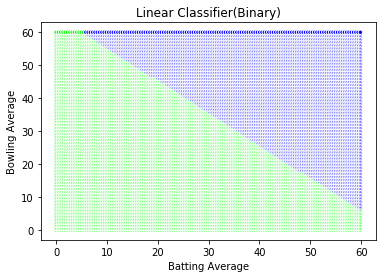

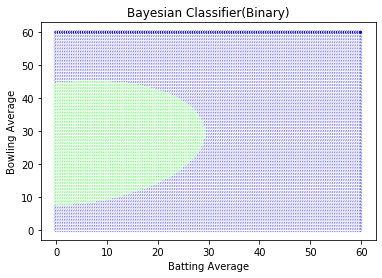

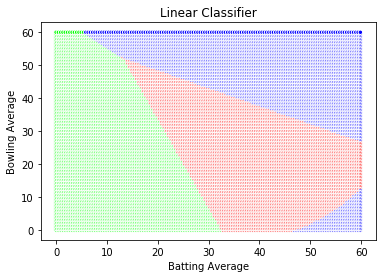

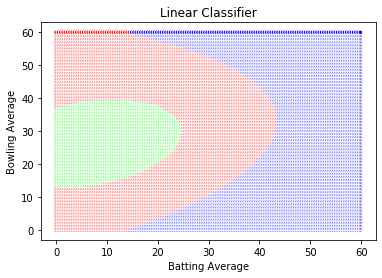

In [65]:
div = 0.45

xx,yy = np.meshgrid(np.arange(0,60,div),np.arange(0,60,div))
Z_lin_b = Lin_clsf_1a(X_train_b.values,Y_train_b.values,np.c_[xx.ravel(), yy.ravel()])
Z_lin = Lin_clsf_2a(X_train.values,Y_train.values,np.c_[xx.ravel(), yy.ravel()])
Z_bay_b = Bayes_clsf_1b(X_train_b.values,Y_train_b.values,np.c_[xx.ravel(), yy.ravel()])
Z_bay = Bayes_clsf_2b(X_train.values,Y_train.values,np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx,yy,c=Z_lin_b.reshape(xx.shape),cmap="brg",s=20, edgecolor='w')
#plt.scatter(X_train_b.T[0],X_train_b.T[1],c=Y_train_b,cmap="brg")
plt.title("Linear Classifier(Binary)")
plt.xlabel("Batting Average")
plt.ylabel("Bowling Average")
plt.show()
plt.scatter(xx,yy,c=Z_bay_b.reshape(xx.shape),cmap="brg",s=20, edgecolor='w')
#plt.scatter(X_train_b.T[0],X_train_b.T[1],c=Y_train_b,cmap="brg")
plt.title("Bayesian Classifier(Binary)")
plt.xlabel("Batting Average")
plt.ylabel("Bowling Average")
plt.show()
plt.scatter(xx,yy,c=Z_lin.reshape(xx.shape),cmap="brg",s=20, edgecolor='w')
#plt.scatter(X_train.T[0],X_train.T[1],c=Y_train,cmap="brg")
plt.title("Linear Classifier")
plt.xlabel("Batting Average")
plt.ylabel("Bowling Average")
plt.show()
plt.scatter(xx,yy,c=Z_bay.reshape(xx.shape),cmap="brg",s=20, edgecolor='w')
#plt.scatter(X_train.T[0],X_train.T[1],c=Y_train,cmap="brg")
plt.title("Linear Classifier")
plt.xlabel("Batting Average")
plt.ylabel("Bowling Average")

plt.show()

**Observations:**

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the four learnt classifiers, and also give the error rate of the four classifiers as a 2x2 table.

** Cell type : TextWrite ** 
(Write your observations and table of errors here)